<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass3/hpdp/HANY/ass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 3: Exploratory Data Analysis (EDA) Using Big Data

## Objective
The objective of this assignment is to perform Exploratory Data Analysis (EDA) on a large dataset using big data tools and techniques. EDA is a critical step in understanding the characteristics of a dataset and uncovering insights that can inform further analysis and decision-making.

Group Members:
<div align="center">

| NAME      | MATRIC NUMBER |
| :----:      |    :----:   |
|   NADIA SYAFIQAH BINTI ZULKIPLI |  A21EC0098        |
|LIEW YVONNE      | A21EC0045       |
|MUHAMMAD HARITH HAKIM BIN OTHMAN      | A21EC0205       |
|  ALYA BALQISS BINTI AZAHAR  |  A21EC0158        |



</div>

##1. Dataset Selection
The dataset that we chose can be retrived through this link [Climate Weather Surface of Brazil - Hourly](https://www.kaggle.com/datasets/PROPPG-PPG/hourly-weather-surface-brazil-southeast-region).

## 2. Data Acquisition
The dataset is already in CSV format.

## 3. Setting Up the Environment


### Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import gc
import glob
import os

#For optimise datatypes
import random
from sys import getsizeof

#For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### 3.1 Load the Dataset

#### Import Libraries

In [ ]:
from  google.colab import files
files.upload()

KeyboardInterrupt: ignored

- **'google.colab import files'** - imports the necessary function to upload files in Colab.

- **'files.upload()'** - initiates a file upload dialog box, enabling users to choose and upload files directly into the Colab notebook.

After running the cell with the code above, it will prompt the user to upload files. Navigate to the intended file(s) for upload, select them, and click "Open".

The uploaded files will be stored in the uploaded dictionary, where the keys are the file names and the values are the file contents. Further process or  actions can be performed with these files as needed within the Colab notebook.

#### Uploading Dataset using Kaggle API
 The process involves setting up Kaggle credentials on Google Colab to enable interaction with the Kaggle API for dataset downloads.  This process enables users to access datasets without the need to download them manually, particularly beneficial for handling large datasets.

In [ ]:
!pip install kaggle # 1. Install the Kaggle Package
!mkdir -p ~/.kaggle # 2. Create a Kaggle Directory
!cp kaggle.json ~/.kaggle/ #3. Upload the Kaggle API Token
!chmod 600 ~/.kaggle/kaggle.json #4. Set File Permission

{"username":"nadiasyafiqah","key":"77aa5208ed521d218af610ad2786fb75"}

**Download the dataset**

In [ ]:
!kaggle datasets download PROPPG-PPG/hourly-weather-surface-brazil-southeast-region

100% 1.58G/1.58G [01:02<00:00, 23.6MB/s]
100% 1.58G/1.58G [01:02<00:00, 27.0MB/s]


**Unzip the downloaded dataset**

In [ ]:
!unzip hourly-weather-surface-brazil-southeast-region.zip

Archive:  hourly-weather-surface-brazil-southeast-region.zip
  inflating: central_west.csv        
  inflating: columns_description.csv  
  inflating: make_dataset.py         
  inflating: metrics.py              
  inflating: north.csv               
  inflating: northeast.csv           
  inflating: south.csv               
  inflating: southeast.csv           
  inflating: stations.csv            


### 3.2 Chunking

In [ ]:
chunk_size = 5000
num = 1
for chunk in pd.read_csv('central_west.csv', chunksize=chunk_size):
  chunk.to_csv('chunk'+str(num)+'.csv', index=False)
  gc.collect()
  num+=1

After chuncking, we need to see if we can read the chunk and review the information.

In [ ]:
df = pd.read_csv('chunk2.csv')
df.head()

,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
0,143998,2017-07-16,22:00,0.0,993.8,993.8,991.9,5,14.9,-9999.0,...,214,10.9,5.8,CO,MS,BELA VISTA,A757,-22.100833,-56.54,208.0
1,143999,2017-07-16,23:00,0.0,995.0,995.0,993.7,-9999,13.6,-9999.0,...,211,10.9,4.5,CO,MS,BELA VISTA,A757,-22.100833,-56.54,208.0
2,144000,2017-07-17,00:00,0.0,996.6,996.6,995.0,-9999,12.2,-9999.0,...,216,10.1,4.7,CO,MS,BELA VISTA,A757,-22.100833,-56.54,208.0
3,144001,2017-07-17,01:00,0.0,997.4,997.4,996.6,-9999,10.9,-9999.0,...,213,9.5,4.8,CO,MS,BELA VISTA,A757,-22.100833,-56.54,208.0
4,144002,2017-07-17,02:00,0.0,998.2,998.2,997.4,-9999,10.1,-9999.0,...,215,10.2,5.6,CO,MS,BELA VISTA,A757,-22.100833,-56.54,208.0


### 3.3 Optimise memory of dataset

Review the dataframe information includes the data types.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   index                                                  5000 non-null   int64  
 1   Data                                                   5000 non-null   object 
 2   Hora                                                   5000 non-null   object 
 3   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       5000 non-null   float64
 4   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  5000 non-null   float64
 5   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        5000 non-null   float64
 6   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       5000 non-null   float64
 7   RADIACAO GLOBAL (Kj/m²)                                5000 non-null   int64  
 8   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)    

From the info, we can see that there are 15 columns with float64. It is one of the common problems with pandas always loading the float data as float64. By optimizing this memory, we could have reduced a part of the memory from our dataset. So we have to convert it to 'float16' or 'float32' to minimise memory usage. Here, we converted it to 'float16'.

In [ ]:
for column in df.columns:
  if df[column].dtype == 'float64':
    df[column] = df[column].astype('float16')
  if df[column].dtype == 'int64':
    df[column] = df[column].astype('int16')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   index                                                  5000 non-null   int16  
 1   Data                                                   5000 non-null   object 
 2   Hora                                                   5000 non-null   object 
 3   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       5000 non-null   float16
 4   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  5000 non-null   float16
 5   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        5000 non-null   float16
 6   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       5000 non-null   float16
 7   RADIACAO GLOBAL (Kj/m²)                                5000 non-null   int16  
 8   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)    

As you can see, the memory usage has been reduced to 439.6+ KB from 1.0+ MB.

<br>

Now we are going to contact all chunk files and optimize the memory as well.

In [ ]:
path = 'central_west.csv'
all_files = glob.glob(os.path.join(path, "*.csv"))
grouped_files = []

for filename in all_files:
  chunk = pd.read_csv(filename, index_col=None, header=0)
  for col in chunk.columns:
    if chunk[col].dtype == 'float64':
      chunk[col] = chunk[col].astype('float16')
    if chunk[col].dtype == 'int64':
        chunk[col] = chunk[col].astype('int8')
  gc.collect()
  grouped_files.append(chunk)

  df = pd.concat(grouped_files, axis=0, ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   index                                                  5000 non-null   int16  
 1   Data                                                   5000 non-null   object 
 2   Hora                                                   5000 non-null   object 
 3   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       5000 non-null   float16
 4   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  5000 non-null   float16
 5   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        5000 non-null   float16
 6   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       5000 non-null   float16
 7   RADIACAO GLOBAL (Kj/m²)                                5000 non-null   int16  
 8   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)    

In [ ]:
df.to_csv("central_west.csv")

In [ ]:
df = pd.read_csv('central_west.csv')
df.head()

,Unnamed: 0,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
0,0,12926,2017-07-16,22:00,0.0,994.0,994.0,992.0,5,14.9,...,214,10.9,5.8,CO,MS,BELA VISTA,A757,-22.1,-56.53,208.0
1,1,12927,2017-07-16,23:00,0.0,995.0,995.0,993.5,-9999,13.6,...,211,10.9,4.5,CO,MS,BELA VISTA,A757,-22.1,-56.53,208.0
2,2,12928,2017-07-17,00:00,0.0,996.5,996.5,995.0,-9999,12.2,...,216,10.1,4.7,CO,MS,BELA VISTA,A757,-22.1,-56.53,208.0
3,3,12929,2017-07-17,01:00,0.0,997.5,997.5,996.5,-9999,10.9,...,213,9.5,4.8,CO,MS,BELA VISTA,A757,-22.1,-56.53,208.0
4,4,12930,2017-07-17,02:00,0.0,998.0,998.0,997.5,-9999,10.1,...,215,10.2,5.6,CO,MS,BELA VISTA,A757,-22.1,-56.53,208.0


### 3.4 Rename columns name

The used dataset are basically in Portuguese. We can see by displaying the column names in the dataframe below.

In [ ]:
#df = pd.read_csv('central_west.csv')
print(df.columns) #Display the current column names in dataframe

Index(['Unnamed: 0', 'index', 'Data', 'Hora',
       'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'RADIACAO GLOBAL (Kj/m²)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VENTO, RAJADA MAXIMA (m/s)',
       'VENTO, VELOCIDADE HORARIA (m/s)', 'region', 'state', 'station',
       'station_code', 'latitude', 'longitude', 'height'],
      dtype='o

Change all the column names to English.

In [ ]:
column_mapping = {
    'Data': 'Date',
    'Hora': 'Time',
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': 'Amount of precipitation, last hour (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'Atmospheric pressure at station level (mB)',
    'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)': 'Maximum air pressure for the last hour (mB)',
    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'Minimum air pressure for the last hour (mB)',
    'RADIACAO GLOBAL (Kj/m²)': 'Solar radiation (Kj/m²)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)': 'Air temperature (instant) (°C)',
    'TEMPERATURA DO PONTO DE ORVALHO (°C)': 'Dew point temperature (instant) (°C)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)': 'Maximum temperature for the last hour (°C)',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)': 'Minimum temperature for the last hour (°C)',
    'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)': 'Maximum dew point temperature for the last hour (°C)',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)': 'Minimum dew point temperature for the last hour (°C)',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'Maximum relative humidity for the last hour (%)',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)': 'Minimum relative humidity for the last hour (%)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)': 'Relative humidity (% instant)',
    'VENTO, DIREÇÃO HORARIA (gr) (° (gr))': 'Wind direction (radius degrees (0-360))',
    'VENTO, RAJADA MAXIMA (m/s)': 'Wind gust (m/s)',
    'VENTO, VELOCIDADE HORARIA (m/s)': 'Wind speed (m/s)',
    'region': 'Brazilian geopolitical regions',
    'state': 'State (Province)',
    'station': 'Station Name (usually city location or nickname)',
    'station_code': 'Station code (INMET number)',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'height': 'Elevation'
}


In [ ]:
df.rename(columns=column_mapping, inplace=True)

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'index', 'Date', 'Time',
       'Amount of precipitation, last hour (mm)',
       'Atmospheric pressure at station level (mB)',
       'Maximum air pressure for the last hour (mB)',
       'Minimum air pressure for the last hour (mB)',
       'Solar radiation (Kj/m²)', 'Air temperature (instant) (°C)',
       'Dew point temperature (instant) (°C)',
       'Maximum temperature for the last hour (°C)',
       'Minimum temperature for the last hour (°C)',
       'Maximum dew point temperature for the last hour (°C)',
       'Minimum dew point temperature for the last hour (°C)',
       'Maximum relative humidity for the last hour (%)',
       'Minimum relative humidity for the last hour (%)',
       'Relative humidity (% instant)',
       'Wind direction (radius degrees (0-360))', 'Wind gust (m/s)',
       'Wind speed (m/s)', 'Brazilian geopolitical regions',
       'State (Province)', 'Station Name (usually city location or nickname)',
       'Station code (INMET num

As we can see, all of the columns have been renamed to English.

### 3.5 Optimise data types

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [ ]:
start_size = getsizeof(df)/(1023.0**3)
print('Dataframe size: %2.2f GB'%start_size)

Dataframe size: 0.00 GB


#### Convert Integer Columns

In [ ]:
#Convert integer columns to smaller integer types if applicable
int_cols = ['Solar radiation (Kj/m²)', 'Maximum relative humidity for the last hour (%)',
                'Minimum relative humidity for the last hour (%)', 'Relative humidity (% instant)',
                'Wind direction (radius degrees (0-360))']

df[int_cols] = df[int_cols].apply(pd.to_numeric, downcast='integer')

#### Convert Float Columns

In [ ]:
#Convert float columns to smaller float types if applicable
float_cols = ['Amount of precipitation, last hour (mm)', 'Atmospheric pressure at station level (mB)',
              'Maximum air pressure for the last hour (mB)', 'Minimum air pressure for the last hour (mB)',
              'Air temperature (instant) (°C)', 'Dew point temperature (instant) (°C)',
              'Maximum temperature for the last hour (°C)', 'Minimum temperature for the last hour (°C)',
              'Maximum dew point temperature for the last hour (°C)', 'Minimum dew point temperature for the last hour (°C)',
              'Wind gust (m/s)', 'Wind speed (m/s)', 'Latitude', 'Longitude', 'Elevation']  # List of float columns to optimize

df[float_cols] = df[float_cols].apply(pd.to_numeric, downcast='float')


#### Convert Object Columns to Category


In [ ]:
#Convert object columns to category if suitable
object_cols = ['Brazilian geopolitical regions', 'State (Province)', 'Station Name (usually city location or nickname)',
               'Station code (INMET number)']  # List of object columns to optimize

for col in object_cols:
    if df[col].nunique() / len(df[col]) < 0.5:  # Adjust the threshold based on your data
        df[col] = df[col].astype('category')


#### Convert Date and Time Columns to datetime


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d').dt.date
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

In [ ]:
df.dtypes

Unnamed: 0                                                 int64
index                                                      int64
Date                                                      object
Time                                                      object
Amount of precipitation, last hour (mm)                  float32
Atmospheric pressure at station level (mB)               float32
Maximum air pressure for the last hour (mB)              float32
Minimum air pressure for the last hour (mB)              float32
Solar radiation (Kj/m²)                                    int16
Air temperature (instant) (°C)                           float32
Dew point temperature (instant) (°C)                     float32
Maximum temperature for the last hour (°C)               float32
Minimum temperature for the last hour (°C)               float32
Maximum dew point temperature for the last hour (°C)     float32
Minimum dew point temperature for the last hour (°C)     float32
Maximum relative humidity

When we try to convert date and time to datetime format, Pandas stores them as datetime objects, which can take more memory due to their internal representation as timestamps. Datetime objects store both date and time information with higher precision, resulting in larger memory usage compared to categorical data.

In [ ]:
final_size = getsizeof(df)/(1024**3)
print('Dataframe size: %2.2f GB'%final_size)

Dataframe size: 0.00 GB


In [ ]:
df.dtypes

Unnamed: 0                                                 int64
index                                                      int64
Date                                                      object
Time                                                      object
Amount of precipitation, last hour (mm)                  float32
Atmospheric pressure at station level (mB)               float32
Maximum air pressure for the last hour (mB)              float32
Minimum air pressure for the last hour (mB)              float32
Solar radiation (Kj/m²)                                    int16
Air temperature (instant) (°C)                           float32
Dew point temperature (instant) (°C)                     float32
Maximum temperature for the last hour (°C)               float32
Minimum temperature for the last hour (°C)               float32
Maximum dew point temperature for the last hour (°C)     float32
Minimum dew point temperature for the last hour (°C)     float32
Maximum relative humidity

#### Convert Object Columns to Category


In [ ]:
#Convert object columns to category if suitable
object_cols = ['Date', 'Time']  # List of object columns to optimize

for col in object_cols:
    if df[col].nunique() / len(df[col]) < 0.5:  # Adjust the threshold based on your data
        df[col] = df[col].astype('category')


In [ ]:
final_size = getsizeof(df)/(1024**3)
print('Dataframe size: %2.2f GB'%final_size)

Dataframe size: 0.00 GB


In [ ]:
print('Total size reduction: %2.1f'%((1-final_size/start_size)*100))

Total size reduction: 82.5


In [ ]:
df.dtypes #Check the optimized data types after conversion

Unnamed: 0                                                 int64
index                                                      int64
Date                                                    category
Time                                                    category
Amount of precipitation, last hour (mm)                  float32
Atmospheric pressure at station level (mB)               float32
Maximum air pressure for the last hour (mB)              float32
Minimum air pressure for the last hour (mB)              float32
Solar radiation (Kj/m²)                                    int16
Air temperature (instant) (°C)                           float32
Dew point temperature (instant) (°C)                     float32
Maximum temperature for the last hour (°C)               float32
Minimum temperature for the last hour (°C)               float32
Maximum dew point temperature for the last hour (°C)     float32
Minimum dew point temperature for the last hour (°C)     float32
Maximum relative humidity

## 4. Data Preprocessing

### 4.1 Missing Values

In [ ]:
def percent_missing_values(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

In [ ]:
percent_missing_values(df)

The dataset contains 0.0 % missing values.


Since the dataset did not contain any missing values, we can proceed with the next steps.

### 4.2 Removing Duplicates

In [ ]:
def drop_duplicates(df):
    old = df.shape[0]
    df.drop_duplicates(inplace=True)
    new = df.shape[0]
    count = old - new
    if (count == 0):
        print("No duplicate rows were found.")
    else:
        print(f"{count} duplicate rows were found and removed.")

In [ ]:
#search for duplicate rows and drop them
drop_duplicates(df)

No duplicate rows were found.


### 4.3 Replace Extreme Values

In [ ]:
columns_to_replace = ['Maximum air pressure for the last hour (mB)', 'Minimum air pressure for the last hour (mB)', 'Solar radiation (Kj/m²)','Dew point temperature (instant) (°C)', 'Amount of precipitation, last hour (mm)',
                      'Maximum temperature for the last hour (°C)', 'Minimum temperature for the last hour (°C)', 'Maximum dew point temperature for the last hour (°C)',
                      'Minimum dew point temperature for the last hour (°C)', 'Maximum relative humidity for the last hour (%)', 'Minimum relative humidity for the last hour (%)',
                      'Relative humidity (% instant)', 'Wind gust (m/s)', ]

for column in columns_to_replace:
    df[column] = df[column].apply(lambda x: 0 if x < 0 else x)

### 4.4 Dropping Unnecessary Columns

The column 'Unamed: 0' most of the times represents the index when we save our dataframe to csv along with our index. In this is the case, since each index is unique and not actually related to each row, removing it is advisable. Let us check its uniqueness.

In [ ]:
# comparing the number of unique values of 'Unnamed: 0' and the number of rows
len(df['Unnamed: 0'].unique()) == df.shape[0]

True

In [ ]:
# removing the column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.head()

,index,Date,Time,"Amount of precipitation, last hour (mm)",Atmospheric pressure at station level (mB),Maximum air pressure for the last hour (mB),Minimum air pressure for the last hour (mB),Solar radiation (Kj/m²),Air temperature (instant) (°C),Dew point temperature (instant) (°C),...,Wind direction (radius degrees (0-360)),Wind gust (m/s),Wind speed (m/s),Brazilian geopolitical regions,State (Province),Station Name (usually city location or nickname),Station code (INMET number),Latitude,Longitude,Elevation
0,12926,2017-07-16,22:00:00,0.0,994.0,994.0,992.0,5,14.9,0.0,...,214,10.9,5.8,CO,MS,BELA VISTA,A757,-22.1,-56.529999,208.0
1,12927,2017-07-16,23:00:00,0.0,995.0,995.0,993.5,0,13.6,0.0,...,211,10.9,4.5,CO,MS,BELA VISTA,A757,-22.1,-56.529999,208.0
2,12928,2017-07-17,00:00:00,0.0,996.5,996.5,995.0,0,12.2,0.0,...,216,10.1,4.7,CO,MS,BELA VISTA,A757,-22.1,-56.529999,208.0
3,12929,2017-07-17,01:00:00,0.0,997.5,997.5,996.5,0,10.9,0.0,...,213,9.5,4.8,CO,MS,BELA VISTA,A757,-22.1,-56.529999,208.0
4,12930,2017-07-17,02:00:00,0.0,998.0,998.0,997.5,0,10.1,0.0,...,215,10.2,5.6,CO,MS,BELA VISTA,A757,-22.1,-56.529999,208.0


## 5. Exploratory Data Analysis
In this section, we will use big data tools to complete the following EDA tasks.

### 5.1 General Statistics

In [ ]:
#To calculate number of elements(cells) in the df
df.size

140000

In [ ]:
#rows and columns in the df
df.shape

(5000, 28)

#### Dataframe Overview

In [ ]:
class DfOverview:
    """
        Give an overview for a given data frame,
        like null persentage for each columns,
        unique value percentage for each columns and more
    """

    def __init__(self, df: pd.DataFrame) -> None:
        self.df = df

    def missing_value(self) -> None:
        nullSum = self.df.isna().sum()
        return [col for col in nullSum]

    def percentage(self, list):
        return [str(round(((value / self.df.shape[0]) * 100), 2)) + '%' for value in list]

    def getOverview(self) -> None:

        _columns = [column for column in self.df]
        _count = self.df.count().values
        _unique = [self.df[column].value_counts().shape[0] for column in self.df]
        _missing_values = self.missing_value()

        columns = [
            'Column',
            'count',
            'missing_value_count',
            'Missing_value_percentage',
            'unique_value_count',
            'unique_value_percentage',
            'dtype']
        data = zip(
            _columns,
            _count,
            _missing_values,
            self.percentage(_missing_values),
            _unique,
            self.percentage(_unique),
            self.df.dtypes
        )
        new_df = pd.DataFrame(data=data, columns=columns)
        return new_df

In [ ]:
df_overview = DfOverview(df)
df_overview.getOverview()

,Column,count,missing_value_count,Missing_value_percentage,unique_value_count,unique_value_percentage,dtype
0,Unnamed: 0,5000,0,0.0%,5000,100.0%,int64
1,index,5000,0,0.0%,5000,100.0%,int64
2,Date,5000,0,0.0%,210,4.2%,category
3,Time,5000,0,0.0%,24,0.48%,category
4,"Amount of precipitation, last hour (mm)",5000,0,0.0%,50,1.0%,float64
5,Atmospheric pressure at station level (mB),5000,0,0.0%,92,1.84%,float32
6,Maximum air pressure for the last hour (mB),5000,0,0.0%,91,1.82%,float64
7,Minimum air pressure for the last hour (mB),5000,0,0.0%,93,1.86%,float64
8,Solar radiation (Kj/m²),5000,0,0.0%,1515,30.3%,int64
9,Air temperature (instant) (°C),5000,0,0.0%,347,6.94%,float32


Here we can see detailed informations of the columns including the amount missing and unique values.


### 5.2 Summary Statistics

We only use numerical columns to compute basic statistics since it is easier to do mathematical operations and calculations on this type of data.

In [ ]:
numerical_columns = df.select_dtypes(include='number').columns
statistics = df[numerical_columns].describe()
statistics

,Unnamed: 0,index,"Amount of precipitation, last hour (mm)",Atmospheric pressure at station level (mB),Maximum air pressure for the last hour (mB),Minimum air pressure for the last hour (mB),Solar radiation (Kj/m²),Air temperature (instant) (°C),Dew point temperature (instant) (°C),Maximum temperature for the last hour (°C),...,Minimum dew point temperature for the last hour (°C),Maximum relative humidity for the last hour (%),Minimum relative humidity for the last hour (%),Relative humidity (% instant),Wind direction (radius degrees (0-360)),Wind gust (m/s),Wind speed (m/s),Latitude,Longitude,Elevation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,15425.500000,0.138360,982.031677,982.136900,981.533800,634.543200,24.107100,10.575520,24.867400,...,10.080460,40.696200,38.477200,39.640800,136.257400,4.905860,2.100040,-20.475191,-56.228607,267.891998
std,1443.520003,1443.520003,1.346852,12.139432,18.432028,18.454888,1036.933504,6.056997,8.719536,6.163508,...,8.458067,33.018624,31.619561,32.248748,106.085324,2.860036,1.311746,3.320672,0.615962,122.402878
min,0.000000,12926.000000,0.000000,953.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-22.100000,-56.529999,208.000000
25%,1249.750000,14175.750000,0.000000,982.000000,982.000000,981.500000,0.000000,21.100000,0.000000,21.500000,...,0.000000,0.000000,0.000000,0.000000,34.000000,2.700000,1.100000,-22.100000,-56.529999,208.000000
50%,2499.500000,15425.500000,0.000000,985.500000,986.000000,985.000000,0.000000,23.750000,12.300000,24.400000,...,11.700000,50.000000,50.000000,50.000000,135.000000,4.300000,1.900000,-22.100000,-56.529999,208.000000
75%,3749.250000,16675.250000,0.000000,989.000000,989.500000,989.000000,970.250000,28.000000,19.200001,29.100000,...,18.400000,52.000000,51.000000,52.000000,221.000000,6.500000,2.900000,-22.100000,-56.529999,208.000000
max,4999.000000,17925.000000,29.400000,1007.500000,1007.500000,1007.500000,3891.000000,38.400002,24.299999,39.500000,...,23.100000,100.000000,98.000000,98.000000,360.000000,24.200001,9.200000,-13.690000,-54.970001,518.000000


The table above summarizes all of the statistics for the relevant numerical variables, such as mean, median, standard deviation, and quantiles.

### 5.3 Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#### (A) Histogram

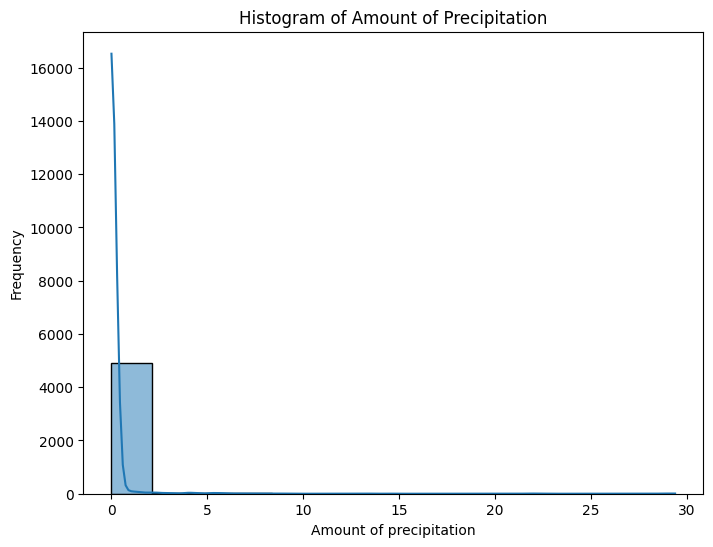

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Amount of precipitation, last hour (mm)'], kde=True)
plt.title('Histogram of Amount of Precipitation')
plt.xlabel('Amount of precipitation')
plt.ylabel('Frequency')
plt.show()

#### (B) Bar Graph

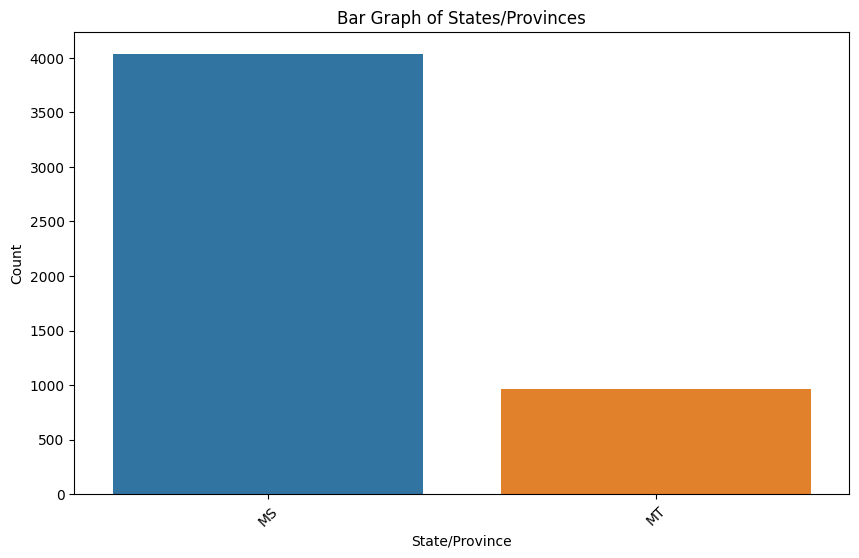

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='State (Province)', data=df)
plt.title('Bar Graph of States/Provinces')
plt.xlabel('State/Province')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

####(C) Box Plot

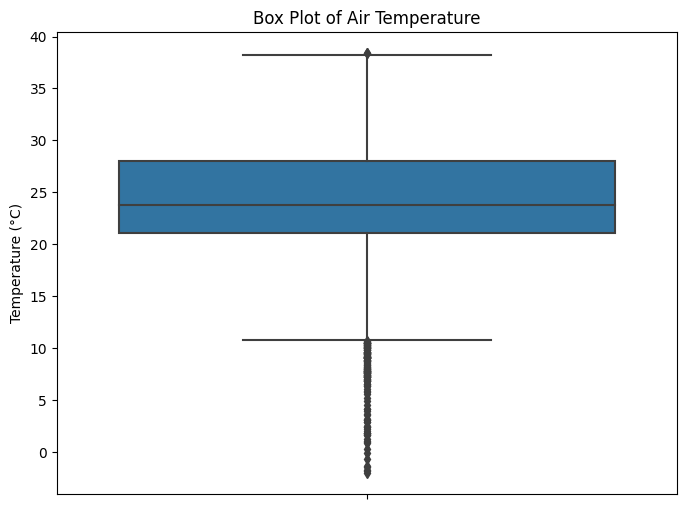

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='Air temperature (instant) (°C)', data=df)
plt.title('Box Plot of Air Temperature')
plt.ylabel('Temperature (°C)')
plt.show()

#### (D) Scatter Plot

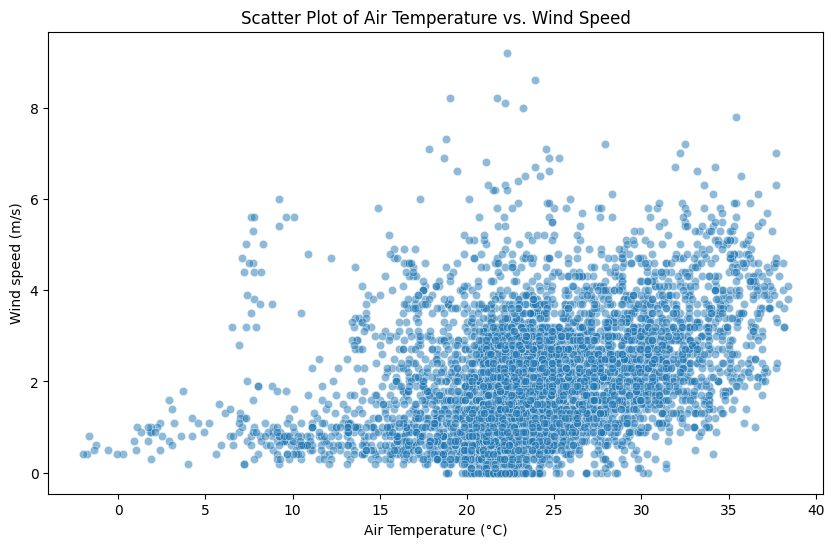

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Air temperature (instant) (°C)', y='Wind speed (m/s)', data=df, alpha=0.5)

plt.title('Scatter Plot of Air Temperature vs. Wind Speed')
plt.xlabel('Air Temperature (°C)')
plt.ylabel('Wind speed (m/s)')

plt.show()

#### (E) Pie Chart

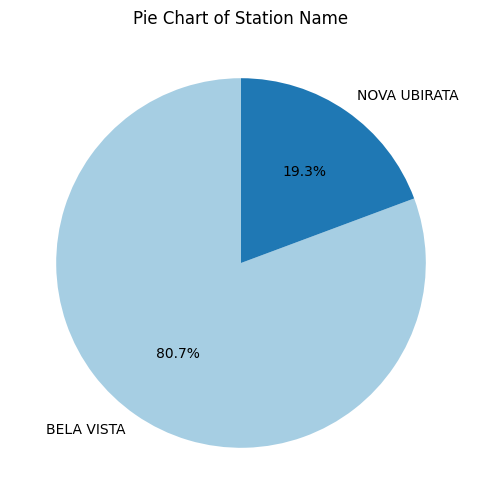

In [ ]:
column_for_pie = 'Station Name (usually city location or nickname)'

values = df[column_for_pie].value_counts()
labels = values.index

plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Pie Chart of Station Name')

plt.show()

### 5.4 Data Exploration

<ipython-input-61-d69dd1e9108a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


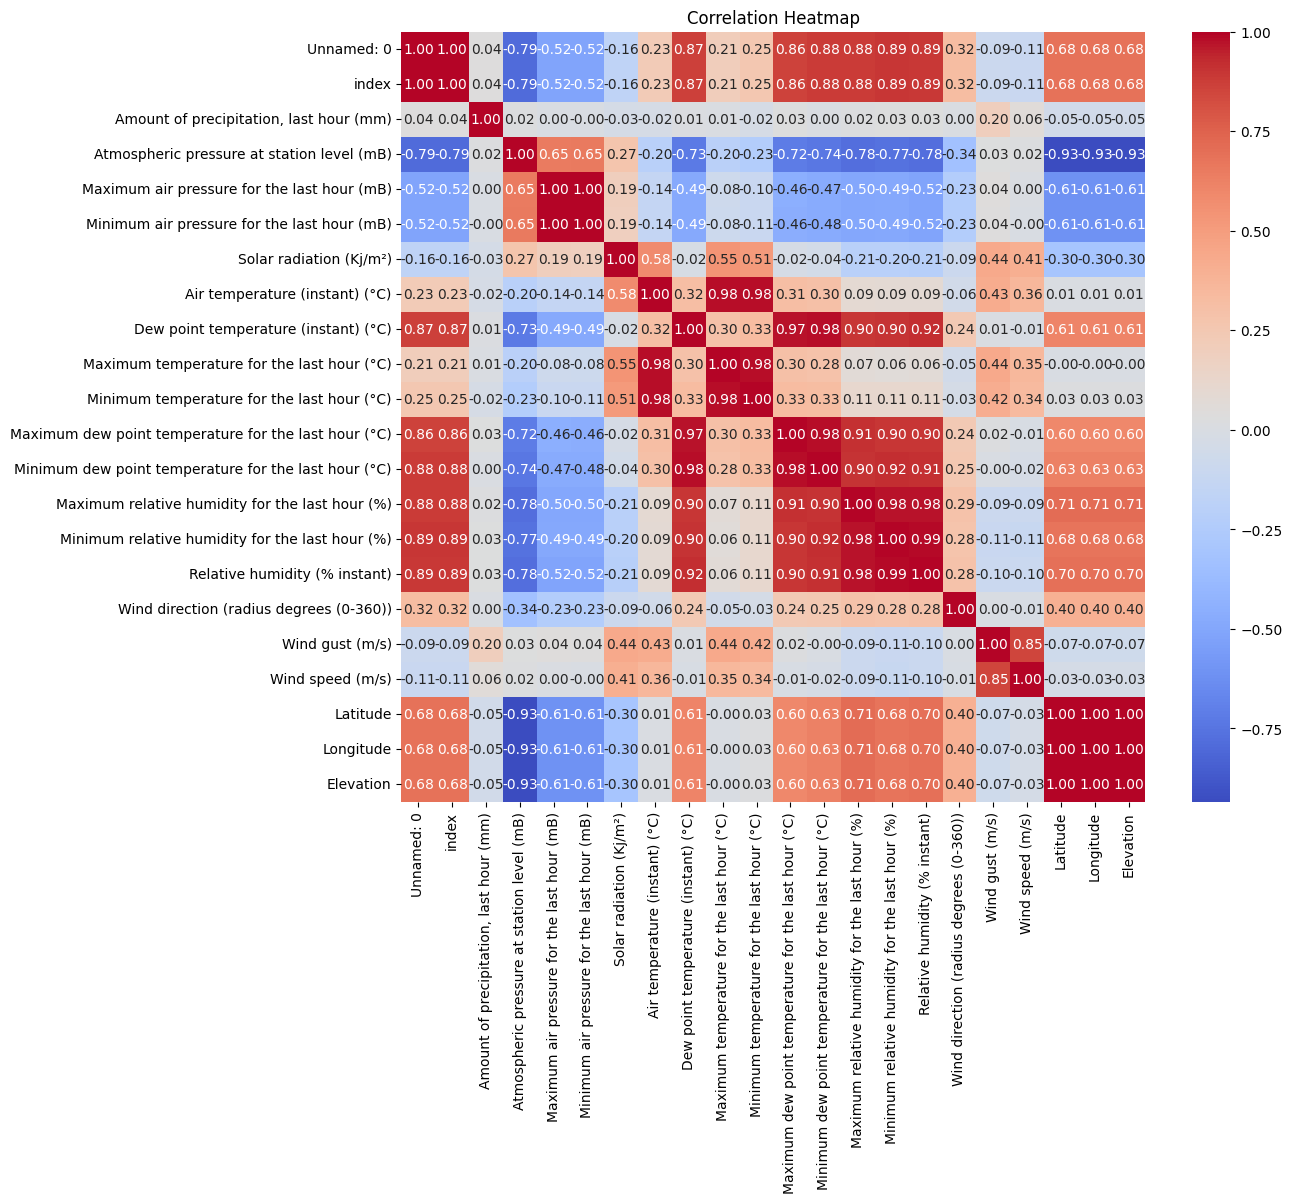

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

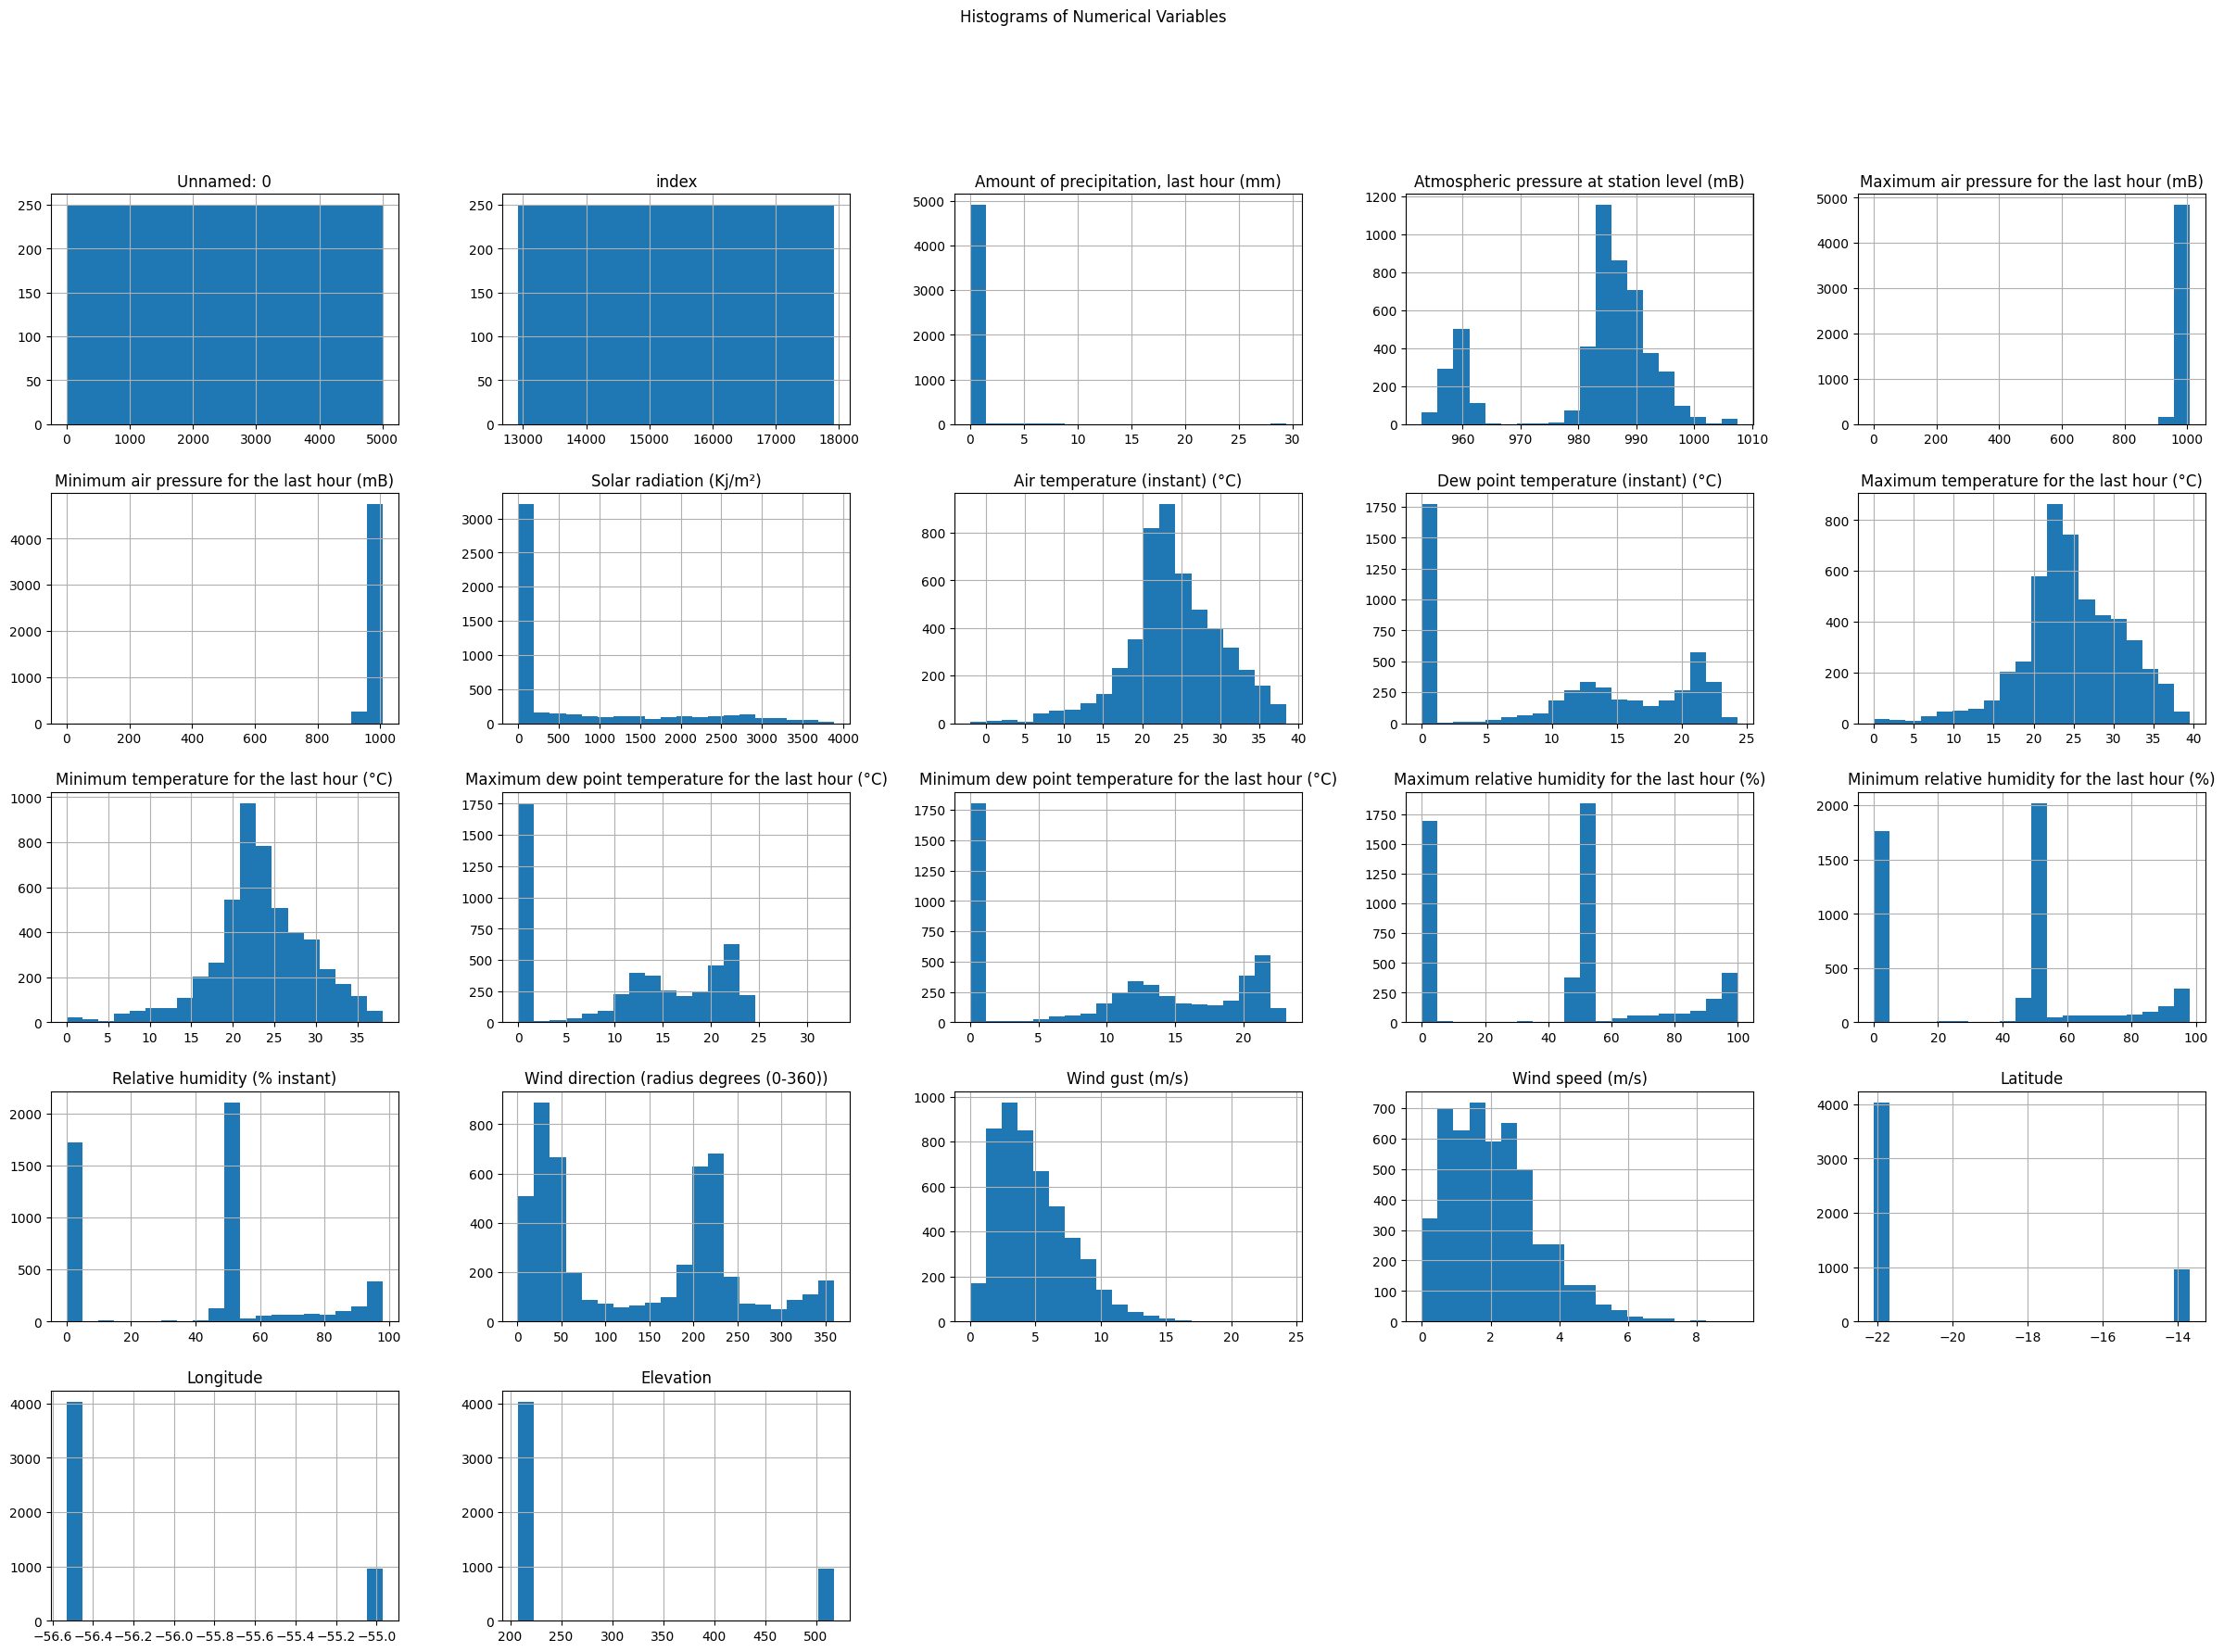

In [ ]:
df.hist(bins=20, figsize=(30, 20))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

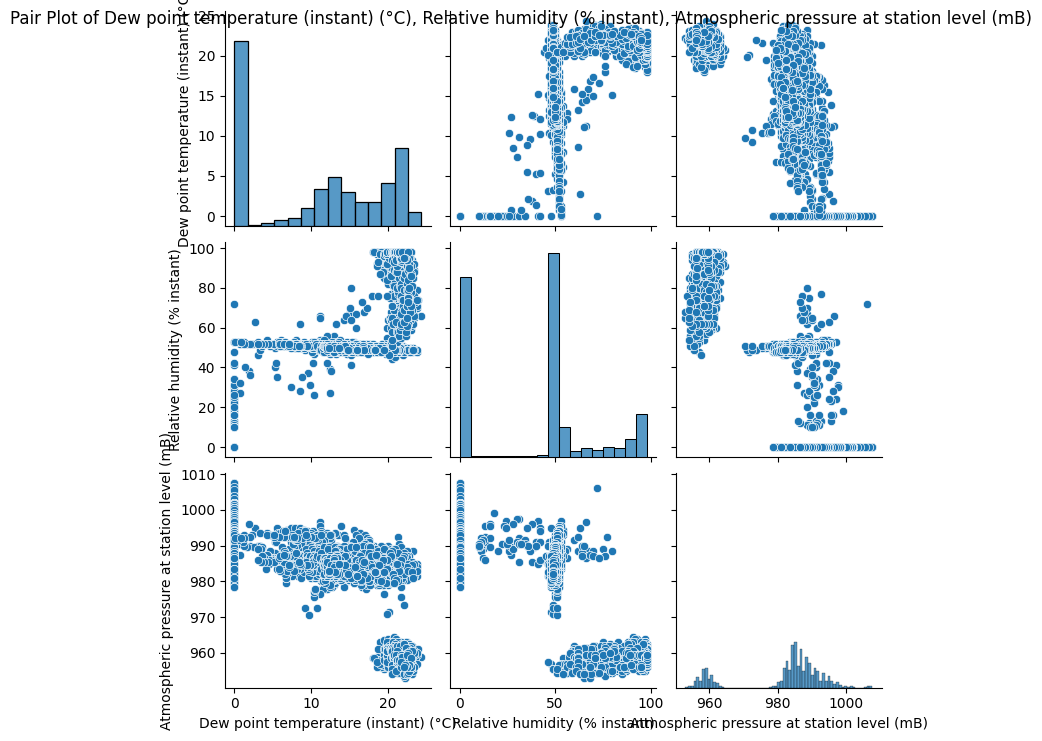

In [ ]:
sns.pairplot(df[['Dew point temperature (instant) (°C)', 'Relative humidity (% instant)', 'Atmospheric pressure at station level (mB)']])
plt.suptitle('Pair Plot of Dew point temperature (instant) (°C), Relative humidity (% instant), Atmospheric pressure at station level (mB)')
plt.show()

### 5.5 Feature Engineering

### Binnning or Discretization
Convert continuous variables into categorical or ordinal variables by binning them into intervals. For instance, temperature ranges (e.g., cold, moderate, hot) or precipitation levels (e.g., low, moderate, high).

In [ ]:
# Define temperature ranges
bins = [0, 10, 20, 30, 40]  # Define temperature ranges (e.g., cold, mild, warm, hot)
labels = ['Cold', 'Mild', 'Warm', 'Hot']  # Labels for the temperature ranges

# Create a new categorical column 'Temperature Category'
df['Temperature Category'] = pd.cut(df['Air temperature (instant) (°C)'], bins=bins, labels=labels)
